In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science/Classification/Churn Project/Models/chatr_clean.csv')

In [3]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber,InternetService_No,Contract_One_Year,Contract_Two_year,PaymentMethod_Crcard,...,DeviceProtection_No_internet_serv,DeviceProtection_Yes,TechSupport_No_internet_serv,TechSupport_Yes,StreamingTV_No_internet_serv,StreamingTV_Yes,StreamingMovies_No_internet_serv,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1.0,29.85,29.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34.0,56.95,1889.50,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2.0,53.85,108.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,7795-CFOCW,0,45.0,42.30,1840.75,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2.0,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
data.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber', 'InternetService_No',
       'Contract_One_Year', 'Contract_Two_year', 'PaymentMethod_Crcard',
       'PaymentMethod_Electr_Check', 'PaymentMethod_Mailed_check',
       'MultipleLines_No_phone_serv', 'MultipleLines_Yes', 'Dependents_Yes',
       'gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No_internet_serv', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Serv', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_serv', 'DeviceProtection_Yes',
       'TechSupport_No_internet_serv', 'TechSupport_Yes',
       'StreamingTV_No_internet_serv', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_serv', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes'],
      dtype='object')

### Sklearn defaults to keep in mind
- Decision Boundary: 50% cutoff value for positive / negative class
- Regularization built in
- Hyperparameter C controls effect of model term. Default C=1.0
- Set C through validation or cross-validation. Larger C allows model to be more complex.
- It's just like the alpha parameter from linear regression regularization, except it multiplies the model term instead of the regularization term. 
- the regularization term can be the squares of the coefficient betas, like ridge regression, - or it could be the absolute values of those betas, like lasso.
- Option to set penalty. Penalty refers to type of regularization penalty:
- L2 default means we're squaring the coefficients
- L1 set for absolute values. You can also set to elastic net penalty. Or completely turn off regularization. 

In [5]:
features_in = ['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber', 'InternetService_No',
       'Contract_One_Year', 'Contract_Two_year', 'PaymentMethod_Crcard',
       'PaymentMethod_Electr_Check', 'PaymentMethod_Mailed_check',
       'MultipleLines_No_phone_serv', 'MultipleLines_Yes', 'Dependents_Yes',
       'gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No_internet_serv', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Serv', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_serv', 'DeviceProtection_Yes',
       'TechSupport_No_internet_serv', 'TechSupport_Yes',
       'StreamingTV_No_internet_serv', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_serv', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes']

y = data['Churn_Yes']
X = data[features_in]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [6]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [7]:
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Accuracy metric on test data

In [8]:
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.7895335608646189

### See how our training data is doing

##### Average Rate of Churn on Test Data

In [9]:
np.mean(y_test)

0.2605233219567691

#### Hard Class Predictions
Predict Churn / Not Churn

In [25]:
y_pred_tst = pipe.predict(X_test)

In [26]:
y_pred_tst

array([0, 0, 1, ..., 0, 0, 0])

#### Soft Class Predictions
If class labels strings Sklearn displays in alphabetical order. If numerical class labels they'll be in ascending order

In [11]:
pipe.predict_proba(X_test)[:5]

array([[0.99479267, 0.00520733],
       [0.8773139 , 0.1226861 ],
       [0.30829241, 0.69170759],
       [0.88565903, 0.11434097],
       [0.63613899, 0.36386101]])

### Accuracy
Percentage of observations that were correctly classified.
When one class is significantly less common that the other accuracy is often not the most helpful metric to optimize.

In [12]:
#accuracy score on train data
pipe.score(X_train, y_train)

0.8065984072810012

In [13]:
#accuracy score on test data
pipe.score(X_test, y_test)

0.7895335608646189

### Confusion Matrix

In [14]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

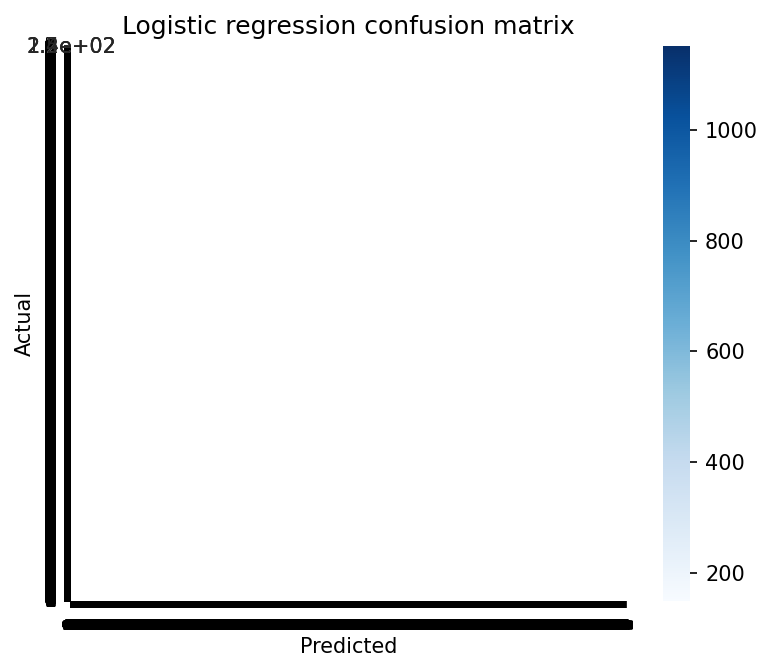

In [27]:
# confusion matrix for logistic regression
logreg_confusion = confusion_matrix(y_test, y_pred_tst)
plt.figure(dpi=150)
sns.heatmap(logreg_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=data['Churn_Yes'],
           yticklabels=data['Churn_Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic regression confusion matrix');

#plt.savefig("confusion_matrix_log_reg")

### Interpreting Coefficients
- One unit of increase in x actually increases the log odds by beta units. 
- In other words: One unit of increase in x, increases the odds by an exponential factor of beta.
- If the features coefficient beta is positive, increasing that feature makes the positive class more likely
- If beta is negative, increasing the feature does the opposite and the positive class becomes less likely

In [ ]:
pipe.coef_, pipe.intercept_

### Determine if class imbalance
- In your case you would compare the percent of your data points with churn == True vs churn == False
- Code example to determine which features have imbalance:
https://elitedatascience.com/imbalanced-classes
https://stackoverflow.com/questions/67287472/how-can-i-find-whether-my-dataset-is-balanced-or-not